## Demonstration of Bivariate Linear Regression

This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).

In order to demonstrate multivariate linear regression, in this notebook the bivariate case is considered for the ease of illustration.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The [Jupyter interactive widgets framework](https://github.com/matplotlib/ipympl) `ipympl` is used for interactive visualization of the two-dimensional dataset. This may require the installation of the `ipympl` package using e.g. conda or pip. Remove the following [magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html) if the package is not installed or if you don't want to use interactive plots.

In [2]:
%matplotlib widget

### Generate Dataset

In the following, a synthetic dataset with $N$ examples is generated by implementing a simple two-dimensional linear relationship and additive noise.

In [3]:
N = 200  # total number of examples
alpha = 1.2  # true intercept
theta = [0.1, 0.25]  # true slopes

X = np.random.uniform(low=-5, high=10, size=(N,2))
Y = alpha + np.dot(X, theta) + .5 * np.random.normal(size=(N))

The data points are plotted in order to investigate the structure of the dataset. The linear relationship becomes clearly visible when inspecting the plot from different viewpoints. The viewpoint can be changed by moving the pointer in the plot with pressed mouse button.

<Axes3D: xlabel='$x_n[0]$', ylabel='$x_n[1]$', zlabel='$y$'>

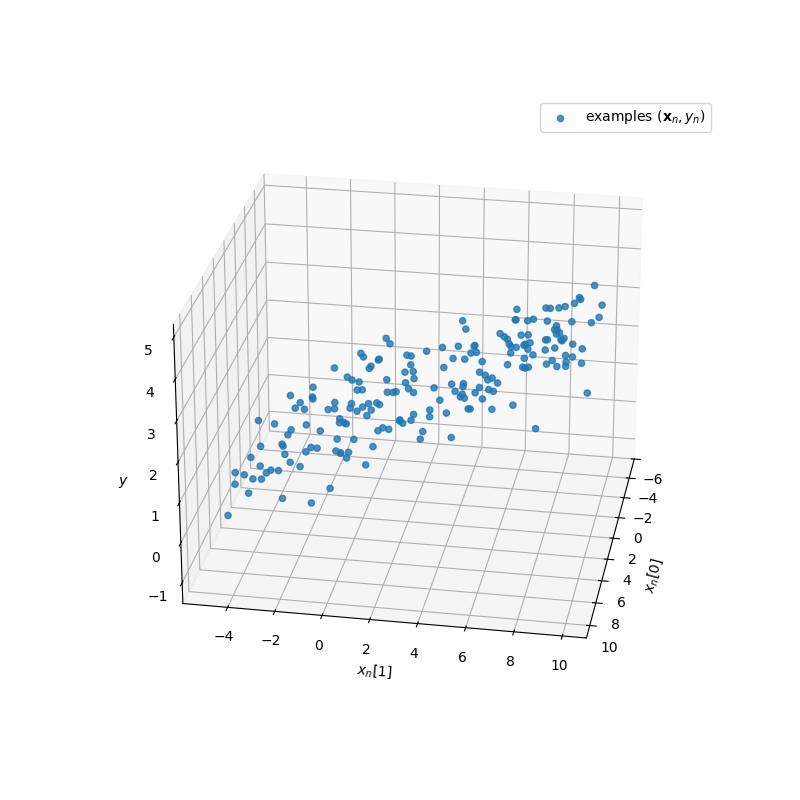

In [4]:
def plot_data(X,Y):
    
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], Y, marker='o', alpha=.8, label=r'examples $(\mathbf{x}_n, y_n)$')
    
    ax.set_xlabel(r'$x_n[0]$')
    ax.set_ylabel(r'$x_n[1]$')
    ax.set_zlabel(r'$y$')
    
    ax.legend()
    ax.view_init(elev=25, azim=10)
    
    return ax

plot_data(X, Y)

### Estimate Parameters of Linear Regression

The parameters of the linear model are estimated by performing a linear regression. First the data matrix is extended in order to incorporate the intercept in the model.

In [5]:
Xt = np.concatenate((np.ones((len(X),1)), X), axis=1)
theta_hat = np.linalg.inv(Xt.T @ Xt) @ Xt.T @ Y

Comparison of the estimated and true parameters reveals that the regression was able to determine the parameters with good accuracy 

In [6]:
print('Estimated/true intercept: {0:.3f} / {1:.3f}'.format(theta_hat[0], alpha))
print('Estimated/true slopes: \n\t first dimension {0:.3f} / {1:.3f} \n\t second dimension {2:.3f} / {3:.3f}'.format(
    theta_hat[1], theta[0], theta_hat[2], theta[1]))

Estimated/true intercept: 1.092 / 1.200
Estimated/true slopes: 
	 first dimension 0.097 / 0.100 
	 second dimension 0.253 / 0.250


A common visualization of linear regression is to show the data points together with the estimated linear predictor illustrated by a (regression) plane. Note, points on the regression plane constitute the output $\hat{y}$ of the linear predictor for a given set of features $\mathbf{x}$. Again, interactive exploration will aid in inspecting the results.

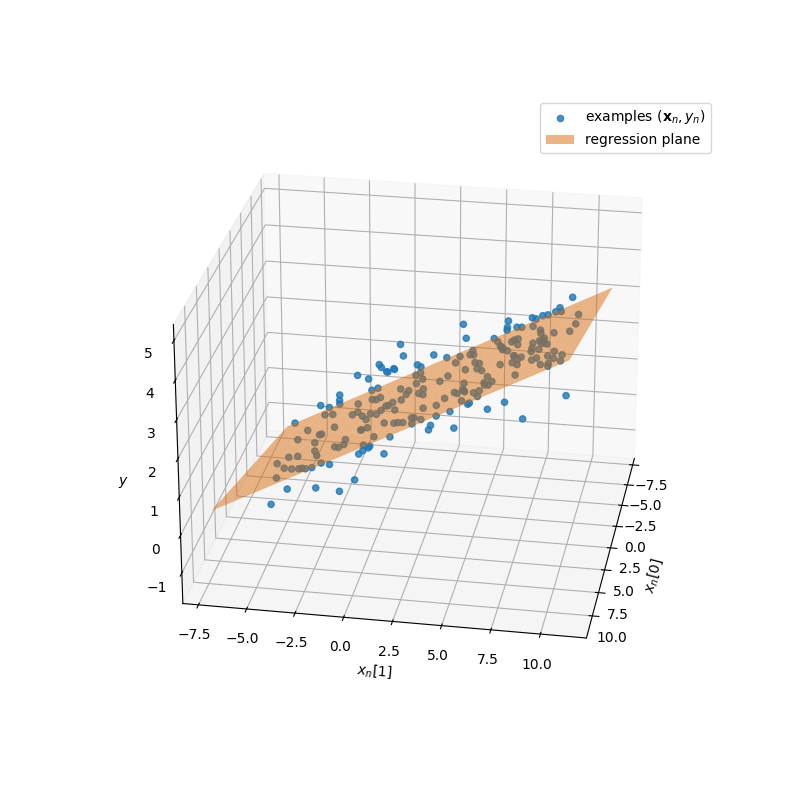

In [7]:
# plot data
ax = plot_data(X, Y)

# plot regression plane
xx, yy = np.meshgrid(range(-7, 12), range(-7, 12))
z = theta_hat[0] + theta_hat[1] * xx + theta_hat[2] * yy
plane = ax.plot_surface(xx, yy, z, alpha=0.5, color='C1',
                        label=r'regression plane')
# see https://stackoverflow.com/questions/55531760/is-there-a-way-to-label-multiple-3d-surfaces-in-matplotlib
plane._facecolors2d = plane._facecolor3d
plane._edgecolors2d = plane._edgecolor3d
ax.legend()

### Evaluation

The statistical properties of the residual error $e = y_n - \hat{y}_n$ provide insights into the validity of the linear model and if the underlying assumptions are met. The [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) $R^2$ is a common measure for the goodness-of-fit of an estimated model. Is bases on the total sum-of-squares and the residual sum-of-squares.

In [8]:
Y_hat = np.dot(Xt, theta_hat)
e = Y - Y_hat
mu_e = np.mean(e)
std_e = np.std(e) 

TSS = np.sum((Y - np.mean(Y))**2)
RSS = np.sum((Y-Y_hat)**2)
Rs = 1 - RSS/TSS

print('Mean of residual error: \t\t {0:.5f}'.format(mu_e))
print('Standard deviation of residual error: \t {0:.5f}'.format(std_e))
print('Total sum-of-squares (TSS): \t\t {0:.5f}'.format(TSS))
print('Residual sum-of-squares (RSS): \t\t {0:.5f}'.format(RSS))
print('Coefficient of determination: \t\t {0:.5f}'.format(Rs))

Mean of residual error: 		 0.00000
Standard deviation of residual error: 	 0.53410
Total sum-of-squares (TSS): 		 326.46567
Residual sum-of-squares (RSS): 		 57.05274
Coefficient of determination: 		 0.82524


**Copyright**

This notebook is provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources).
The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/)
, the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: Sascha Spors, Data driven audio signal processing - Lecture supplementals.